In [ ]:
from sklearn.datasets import load_digits

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digits = load_digits()
print("Image Data shape:", digits.data.shape)
print("Target Label shape:", digits.target.shape)

Image Data shape: (1797, 64)
Target Label shape: (1797,)


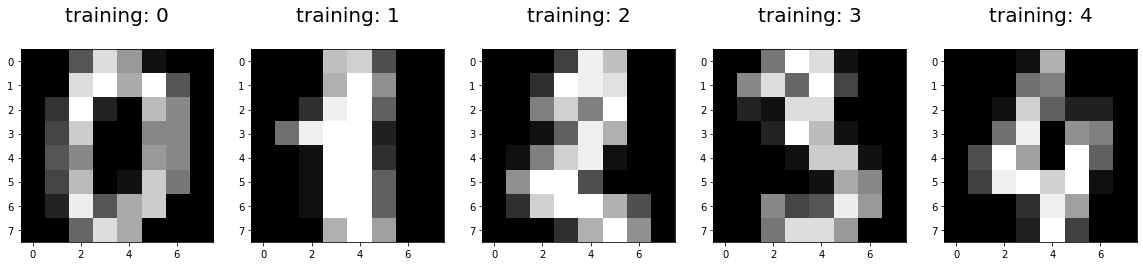

In [ ]:
plt.figure(figsize = (20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
  plt.subplot(1,5, index+1)
  plt.imshow(np.reshape(image,(8,8)), cmap= plt.cm.gray)
  plt.title("training: %i\n"%label, fontsize = 20)

In [31]:
for index in enumerate(zip(digits.data[0:5], digits.target[0:5])):
                           print(index)
                  #         print(image)
                 #          print(label)
                           break

(0, (array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]), 0))


In [33]:
print(digits.data[0].shape)

(64,)


In [39]:
xtrain, xtest, ytrain,ytest = train_test_split(digits.data, digits.target, test_size = 0.23, random_state = 2)
print(xtrain.shape,"--->",ytrain.shape ,"--->",xtest.shape,"--->",ytest.shape)

(1383, 64) ---> (1383,) ---> (414, 64) ---> (414,)


In [42]:
print(xtest[0])

[ 0.  0.  0.  3. 16.  3.  0.  0.  0.  0.  0. 10. 16. 11.  0.  0.  0.  0.
  4. 16. 16.  8.  0.  0.  0.  2. 14. 12. 16.  5.  0.  0.  0. 10. 16. 14.
 16. 16. 11.  0.  0.  5. 12. 13. 16.  8.  3.  0.  0.  0.  0.  2. 15.  3.
  0.  0.  0.  0.  0.  4. 12.  0.  0.  0.]


In [44]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain, ytrain)
print(lr.predict(xtest[0:10]))
print(ytest[0:10])

[4 0 9 1 8 7 1 5 1 6]
[4 0 9 1 4 7 1 5 1 6]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [45]:
score = lr.score(xtest,ytest)

In [46]:
score

0.9516908212560387

In [49]:
y_pred = lr.predict(xtest)

Text(0.5, 1.0, 'Accuracy Score: 0.9516908212560387')

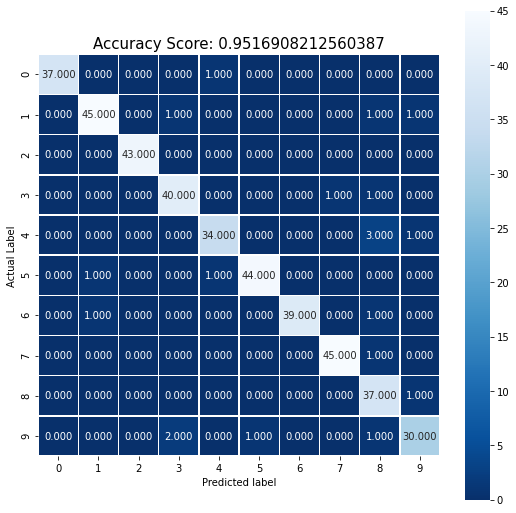

In [56]:
plt.figure(figsize=(9,9))
sns.heatmap(metrics.confusion_matrix(ytest, y_pred),annot=True, fmt = ".3f",  linewidths=.5, square= True ,cmap = "Blues_r")
plt.ylabel("Actual Label")
plt.xlabel("Predicted label")
all_sample_title = "Accuracy Score: "+ str(lr.score(xtest,ytest))
plt.title(all_sample_title,size =15)

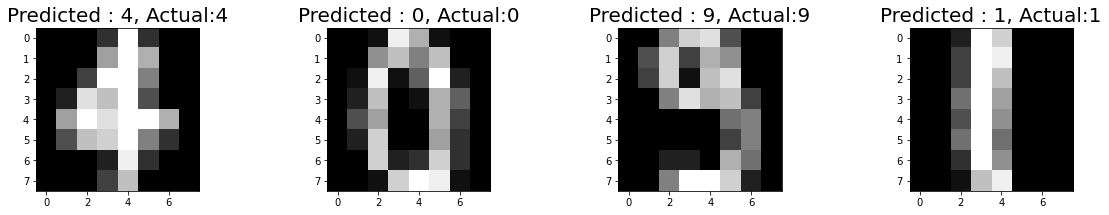

In [60]:
index= 0
classifiedIndex = []
for predict,actual in zip(y_pred, ytest):
  if predict ==  actual:
    classifiedIndex.append(index)
  index+=1

plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
  plt.subplot(1,4,plotIndex+1)
  plt.imshow(np.reshape(xtest[wrong],(8,8)),cmap = plt.cm.gray)
  plt.title("Predicted : {}, Actual:{}".format(y_pred[wrong],ytest[wrong]), fontsize=20)